In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import stopwords and text processing libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import sklearn

In [ ]:
raw_data = pd.read_csv('all_merged_data.csv')

In [ ]:
raw_data.columns

Index(['Link', 'Date', 'Title', 'Description'], dtype='object')

In [ ]:
raw_data.isnull().sum()

Link           0
Date           0
Title          0
Description    0
dtype: int64

In [ ]:
raw_data.reset_index(inplace=True, drop=True)

In [ ]:
raw_data.head()

,Link,Date,Title,Description
0,https://www.moneycontrol.com/news/business/mar...,"April 03, 2024 05:13 PM IST","Technical View: Nifty consolidates again, deci...","The volatility cooled down further, consistent..."
1,https://www.moneycontrol.com/news/business/mar...,"April 03, 2024 03:45 PM IST",Taking Stock: Market inches closer to record h...,Broader indices outperformed with BSE midcap i...
2,https://www.moneycontrol.com/news/business/lar...,"April 03, 2024 03:22 PM IST",Large caps gear up to drive market; capital go...,Technical indicators show that select large ca...
3,https://www.moneycontrol.com/news/business/mar...,"April 03, 2024 03:10 PM IST",Sensex slips for second straight day; analysts...,Analysts at ICICI Securities see the stage set...
4,https://www.moneycontrol.com/news/business/mar...,"April 03, 2024 01:10 PM IST","Bank Nifty recovers from early losses, to expi...",Bank Nifty is expected to remain sideways to b...


In [ ]:
# checking whether duplicate records are present

dup_list = list(raw_data.duplicated(keep='first').values)
dup_list.count(True)

72

In [ ]:
# creating a function for preprocessing

def preprocessing_text(data):

    #convert all to lowercase
    data = data.lower()


    #removing puntuations
    data = re.sub(r'[^\w\s]','', data, flags=re.MULTILINE)


    #remove stopwords
    tokens = word_tokenize(data)
    word_tokens = [w for w in tokens if w not in stopwords]


    #stemming
    stemmer = PorterStemmer()
    stem_words = [stemmer.stem(w) for w in word_tokens]


    #lemmitizing
    lemmer = WordNetLemmatizer()
    lem_words = [lemmer.lemmatize(w) for w in stem_words]

    return " ".join(lem_words)

In [ ]:
# import sentiment intensity analyzer

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# create sentiment intensity analyzer object
SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Saee\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# fuction to  decide sentiment as positive, negative and neutral

def mapper(data):
    if data > 0:
        return "Positive"
    elif data < 0:
        return "Negative"
    else:
        return "Neutral"

def sentiment_analysis(df, colm_name):

    # assigning polarity scores for description column
    df['polarity_scores'] = df[colm_name].apply(lambda w: SIA.polarity_scores(w))

    # picking only compound score(combined score)
    df['compound_score'] = df['polarity_scores'].apply(lambda x: x['compound'])
     # mapping the compound score to positive, negative or neutral
    df['ds_score'] = df['compound_score'].apply(mapper)

    df.drop(['polarity_scores', 'compound_score'], axis=1, inplace=True)

    return df

In [ ]:
# apply preprocessing to the description of new dataset
import nltk
nltk.download('punkt')
nltk.download('wordnet')

raw_data['Description'] = raw_data['Description'].apply(preprocessing_text)
raw_data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Saee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Link,Date,Title,Description
0,https://www.moneycontrol.com/news/business/mar...,"April 03, 2024 05:13 PM IST","Technical View: Nifty consolidates again, deci...",volatil cool consist give comfort support bull...
1,https://www.moneycontrol.com/news/business/mar...,"April 03, 2024 03:45 PM IST",Taking Stock: Market inches closer to record h...,broader indic outperform bse midcap index 06 p...
2,https://www.moneycontrol.com/news/business/lar...,"April 03, 2024 03:22 PM IST",Large caps gear up to drive market; capital go...,technic indic show select larg cap stock get w...
3,https://www.moneycontrol.com/news/business/mar...,"April 03, 2024 03:10 PM IST",Sensex slips for second straight day; analysts...,analyst icici secur see stage set nifti propel...
4,https://www.moneycontrol.com/news/business/mar...,"April 03, 2024 01:10 PM IST","Bank Nifty recovers from early losses, to expi...",bank nifti expect remain sideway bullish susta...
...,...,...,...,...
787,https://www.moneycontrol.com/news/business/mar...,"February 01, 2024 04:07 PM IST",Budget Verdict | Fiscal deficit at 5.1% aggres...,sharma said wasnt surpris interim budget annou...
788,https://www.moneycontrol.com/news/business/mar...,"February 01, 2024 03:44 PM IST","No cheer for market on Budget day; Sensex, Nif...",top nifti gainer maruti suzuki cipla eicher mo...
789,https://www.moneycontrol.com/news/business/bud...,"February 01, 2024 03:23 PM IST",Nothing new in Interim Budget; see deep value ...,tradit theme continu power psu bank larg infra...
790,https://www.moneycontrol.com/news/business/mar...,"February 01, 2024 03:07 PM IST","Nifty, Sensex end mildly in red; Budget over, ...",nifti metal led loss fall around 1 percent nif...


In [ ]:
# apply the function  which decides sentiment to  polarity score column

df = sentiment_analysis(raw_data, 'Description')
df

,Link,Date,Title,Description,ds_score
0,https://www.moneycontrol.com/news/business/mar...,"April 03, 2024 05:13 PM IST","Technical View: Nifty consolidates again, deci...",volatil cool consist give comfort support bull...,Positive
1,https://www.moneycontrol.com/news/business/mar...,"April 03, 2024 03:45 PM IST",Taking Stock: Market inches closer to record h...,broader indic outperform bse midcap index 06 p...,Positive
2,https://www.moneycontrol.com/news/business/lar...,"April 03, 2024 03:22 PM IST",Large caps gear up to drive market; capital go...,technic indic show select larg cap stock get w...,Positive
3,https://www.moneycontrol.com/news/business/mar...,"April 03, 2024 03:10 PM IST",Sensex slips for second straight day; analysts...,analyst icici secur see stage set nifti propel...,Neutral
4,https://www.moneycontrol.com/news/business/mar...,"April 03, 2024 01:10 PM IST","Bank Nifty recovers from early losses, to expi...",bank nifti expect remain sideway bullish susta...,Neutral
...,...,...,...,...,...
787,https://www.moneycontrol.com/news/business/mar...,"February 01, 2024 04:07 PM IST",Budget Verdict | Fiscal deficit at 5.1% aggres...,sharma said wasnt surpris interim budget annou...,Neutral
788,https://www.moneycontrol.com/news/business/mar...,"February 01, 2024 03:44 PM IST","No cheer for market on Budget day; Sensex, Nif...",top nifti gainer maruti suzuki cipla eicher mo...,Negative
789,https://www.moneycontrol.com/news/business/bud...,"February 01, 2024 03:23 PM IST",Nothing new in Interim Budget; see deep value ...,tradit theme continu power psu bank larg infra...,Negative
790,https://www.moneycontrol.com/news/business/mar...,"February 01, 2024 03:07 PM IST","Nifty, Sensex end mildly in red; Budget over, ...",nifti metal led loss fall around 1 percent nif...,Negative


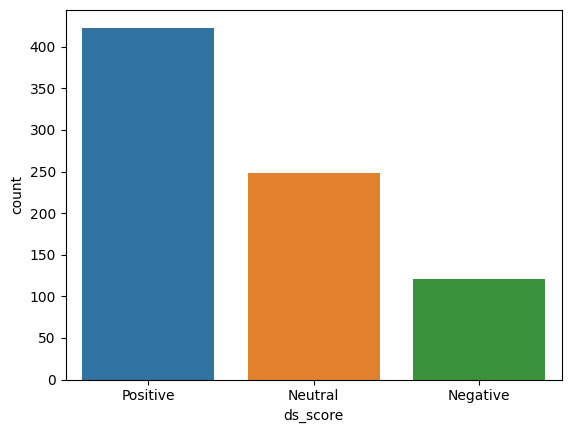

In [ ]:
# plot a count plot on description score column
sns.countplot(x='ds_score', data=df);

In [ ]:
#MOdelling DAta
# split the dataset  into test and train

from sklearn.model_selection import train_test_split

X = df['Description']
y = df.ds_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=212)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712,) (80,) (712,) (80,)


In [ ]:
#Train SVM model
##%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score


# Fit the pipeline to the data
lin_svc_ds = Pipeline([('tfidf', TfidfVectorizer()),
                      ('lin_svc', LinearSVC())])

lin_svc_ds.fit(X_train, y_train)

# predict on test dataset
pred = lin_svc_ds.predict(X_test)

print("MODEL: LINEAR SVC")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LINEAR SVC
accuarcy score:  0.8375
Confusion matrix:  [[ 4  0  2]
 [ 1 20  8]
 [ 0  2 43]]
              precision    recall  f1-score   support

    Negative       0.80      0.67      0.73         6
     Neutral       0.91      0.69      0.78        29
    Positive       0.81      0.96      0.88        45

    accuracy                           0.84        80
   macro avg       0.84      0.77      0.80        80
weighted avg       0.85      0.84      0.83        80



c:\Users\Saee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
# Perforn the prediction on the test dataset
pred = lin_svc_ds.predict(X_test)
pred

array(['Neutral', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Neutral', 'Positive', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive',
       'Negative', 'Neutral', 'Neutral', 'Positive', 'Neutral',
       'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Negative',
    

In [ ]:
# creating a dataframe of predicted results
pred = pd.DataFrame(pred, columns=['predictions'])

In [ ]:
pred

,predictions
0,Neutral
1,Positive
2,Negative
3,Neutral
4,Neutral
...,...
75,Negative
76,Positive
77,Positive
78,Neutral


tikertape

screnner

finance statements

BSC india NSC india use it for api